# Data analysis

In [19]:
import glob, os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sigmaclip as clip
import numpy as np
from astropy.stats import sigma_clip

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [20]:
!ls

Analysis.ipynb           cql_runtimes_5_5.json    draco_runtimes_25_1.json
chart.vl.json            draco_runtimes_10_1.json draco_runtimes_25_2.json
cql_runtimes_10_1.json   draco_runtimes_10_2.json draco_runtimes_25_3.json
cql_runtimes_10_2.json   draco_runtimes_10_3.json draco_runtimes_25_4.json
cql_runtimes_10_3.json   draco_runtimes_10_4.json draco_runtimes_25_5.json
cql_runtimes_15_1.json   draco_runtimes_10_5.json draco_runtimes_5_1.json
cql_runtimes_15_2.json   draco_runtimes_15_1.json draco_runtimes_5_2.json
cql_runtimes_15_3.json   draco_runtimes_15_2.json draco_runtimes_5_3.json
cql_runtimes_20_1.json   draco_runtimes_15_3.json draco_runtimes_5_4.json
cql_runtimes_20_2.json   draco_runtimes_15_4.json draco_runtimes_5_5.json
cql_runtimes_25_1.json   draco_runtimes_15_5.json results.json
cql_runtimes_25_2.json   draco_runtimes_20_1.json run_cql_benchmark.sh
cql_runtimes_5_1.json    draco_runtimes_20_2.json run_draco_benchmark.sh
cql_runtimes_5_2.json    draco_runtimes_20_3.jso

In [21]:
draco = pd.concat(map(pd.read_json, glob.glob('draco_runtimes*.json')))
cql = pd.concat(map(pd.read_json, glob.glob('cql_runtimes*.json')))

df = pd.concat([cql, draco])
df = df.reindex()

In [22]:
df

,encodings,fields,runtime,system
0,1,25,0.062,cql
1,1,25,0.045,cql
2,1,25,0.045,cql
3,1,25,0.045,cql
4,1,25,0.039,cql
5,1,25,0.037,cql
6,1,25,0.041,cql
7,1,25,0.031,cql
8,1,25,0.031,cql
9,1,25,0.041,cql


In [23]:
def reject_outliers(sr, iq_range=0.5):
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([pcnt, 0.50, 1-pcnt])
    iqr = qhigh - qlow
    return sr[ (sr - median).abs() <= iqr]

def sigma_clipping(data):
    return pd.Series(clip(data, 4, 4)[0])

def sigma_clipping2(data):
    return pd.Series(sigma_clip(data)).dropna()

17
19
18


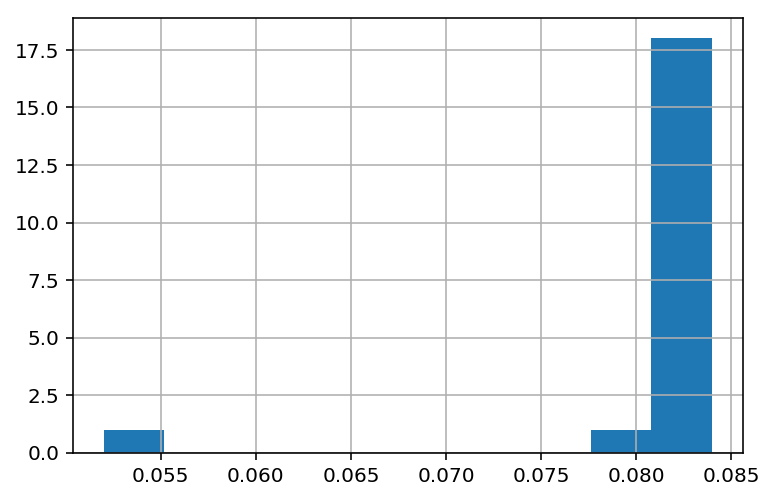

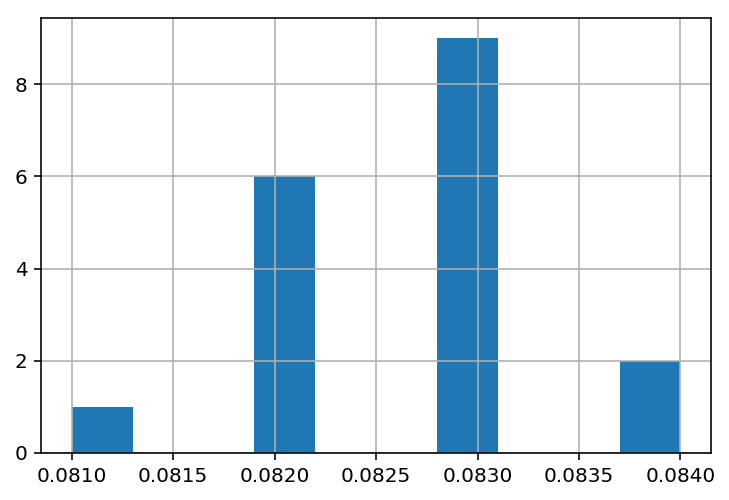

In [24]:
filtered = df[df.system == 'draco']
filtered = filtered[filtered.fields == 5]
filtered = filtered[filtered.encodings == 4]
print(len(reject_outliers(filtered.runtime)))
print(len(sigma_clipping(filtered.runtime)))
print(len(sigma_clipping2(filtered.runtime)))
filtered.runtime.hist()
plt.show()
sigma_clipping2(filtered.runtime).hist()

In [25]:
gb = df.groupby(['system', 'encodings', 'fields'])
results = pd.DataFrame(columns=['system', 'encodings', 'fields', 'runtime'])

for i, (name, group) in enumerate(gb):
#     print(group)
#     group.runtime.hist()
    before = group.runtime
    after = sigma_clipping2(before)
    print(name, len(before), len(after))
    
    results = results.append(pd.DataFrame.from_dict([{
        'system': name[0],
        'encodings': name[1],
        'fields': name[2],
        'mean': np.mean(after),
        'stdev': np.std(after),
        'min': np.min(before),
        'max': np.max(before),
        'runtime': np.median(before)
    }]))
#     plt.show()

('cql', 1, 5) 20 20
('cql', 1, 10) 20 19
('cql', 1, 15) 20 20
('cql', 1, 20) 20 20
('cql', 1, 25) 20 19
('cql', 2, 5) 20 20
('cql', 2, 10) 20 19
('cql', 2, 15) 20 18
('cql', 2, 20) 20 20
('cql', 2, 25) 20 20
('cql', 3, 5) 20 17
('cql', 3, 10) 20 19
('cql', 3, 15) 20 20
('cql', 4, 5) 20 20
('cql', 5, 5) 20 18
('draco', 1, 5) 20 18
('draco', 1, 10) 20 19
('draco', 1, 15) 20 20
('draco', 1, 20) 20 17
('draco', 1, 25) 20 18
('draco', 2, 5) 20 19
('draco', 2, 10) 20 19
('draco', 2, 15) 20 20
('draco', 2, 20) 20 19
('draco', 2, 25) 20 20
('draco', 3, 5) 20 20
('draco', 3, 10) 20 17
('draco', 3, 15) 20 17
('draco', 3, 20) 20 17
('draco', 3, 25) 20 20
('draco', 4, 5) 20 18
('draco', 4, 10) 20 18
('draco', 4, 15) 20 19
('draco', 4, 20) 20 19
('draco', 4, 25) 20 20
('draco', 5, 5) 20 18
('draco', 5, 10) 20 20
('draco', 5, 15) 20 20
('draco', 5, 20) 20 19
('draco', 5, 25) 20 20


In [26]:
results

,encodings,fields,max,mean,min,runtime,stdev,system
0,1,5,0.011,0.007300,0.005,0.0065,2.051828e-03,cql
0,1,10,0.071,0.019000,0.013,0.0195,4.242641e-03,cql
0,1,15,0.052,0.029000,0.017,0.0295,7.829432e-03,cql
0,1,20,0.057,0.034400,0.023,0.0330,8.760137e-03,cql
0,1,25,0.062,0.033211,0.026,0.0310,7.015614e-03,cql
0,2,5,0.047,0.027300,0.019,0.0270,6.790434e-03,cql
0,2,10,0.407,0.278263,0.251,0.2770,1.878925e-02,cql
0,2,15,0.645,0.507167,0.481,0.5005,2.321697e-02,cql
0,2,20,1.310,1.153100,1.063,1.1390,6.561928e-02,cql
0,2,25,1.949,1.810100,1.719,1.7940,6.627963e-02,cql


In [27]:
results.to_json('results.json',orient='records')